## Task 1: A classification example: fetal heart condition diagnosis

## Step1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
data = pd.read_csv('CTG.csv', skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [2]:
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


In [3]:
Y

658      normal
1734     normal
1226     normal
1808     normal
825     suspect
         ...   
1033     normal
1731     normal
763      normal
835      normal
1653     normal
Name: NSP, Length: 2126, dtype: object

In [2]:
data_shuffled

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0,1.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0,1.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0,1.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0,1.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,135.0,3.0,0.0,2.0,3.0,0.0,0.0,25.0,1.5,0.0,...,90.0,158.0,3.0,0.0,136.0,134.0,136.0,10.0,0.0,1.0
1731,134.0,9.0,1.0,11.0,6.0,0.0,0.0,61.0,1.1,0.0,...,80.0,189.0,10.0,0.0,156.0,144.0,151.0,61.0,0.0,1.0
763,129.0,3.0,1.0,0.0,0.0,0.0,0.0,59.0,0.9,21.0,...,66.0,184.0,18.0,0.0,133.0,135.0,137.0,7.0,0.0,1.0
835,128.0,3.0,0.0,1.0,5.0,0.0,0.0,16.0,3.3,0.0,...,57.0,171.0,6.0,1.0,136.0,130.0,136.0,26.0,1.0,1.0


## Step2

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
clf = DummyClassifier(strategy='most_frequent')
cross_val_score(clf, Xtrain, Ytrain).mean()

0.7805882352941176

##  Step3

### Linear classifiers:

#####  sklearn.linear_model.Perceptron

In [9]:
from sklearn.linear_model import Perceptron
per = Perceptron(tol=1e-3, random_state=0)
#per.fit(Xtrain, Ytrain)
cross_val_score(per, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

0.825294117647059

##### sklearn.linear_model.LogisticRegression

In [7]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
#log.fit(Xtrain, Ytrain)
cross_val_score(log, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

F:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8741176470588234

##### sklearn.svm.LinearSVC

In [5]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=0, tol=1e-05)
#svc = svc.fit(Xtrain,Ytrain)
cross_val_score(svc, Xtrain, Ytrain, cv=5, scoring='accuracy').mean()

F:\Anaconda\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
F:\Anaconda\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
F:\Anaconda\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
F:\Anaconda\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
F:\Anaconda\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8452941176470589

## Task 2: Decision trees for classification

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
clf = DecisionTreeClassifier(max_depth = 1)
clf.fit(Xtrain, Ytrain);
from sklearn.model_selection import cross_val_score

cross_val_score(clf, Xtrain, Ytrain, cv=5).mean()

0.8164705882352941

In [9]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [10]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

In [11]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [12]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [13]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

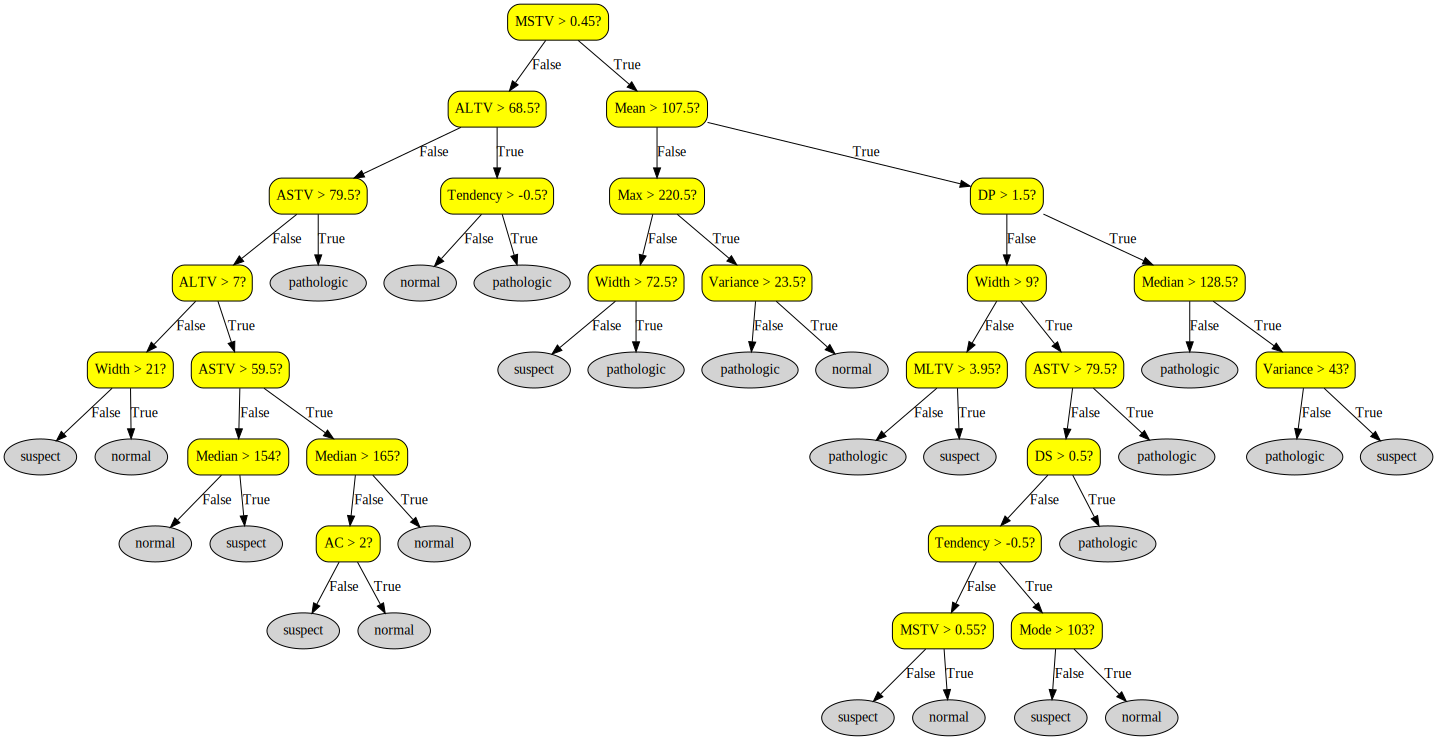

In [16]:
cls = TreeClassifier(max_depth=8)
cls.fit(Xtrain, Ytrain)
cls.draw_tree()

## Task 3: A regression example: predicting apartment prices

In [17]:
import numpy as np
# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.0009973 , 0.0009973 , 0.        , 0.00099707, 0.0009973 ]),
 'score_time': array([0.       , 0.       , 0.0009973, 0.       , 0.       ]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

##### sklearn.linear_model.LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
cross_validate(lin, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score'].mean()

-0.3013986588767211

##### sklearn.linear_model.Ridge

In [19]:
from sklearn.linear_model import Ridge
rig = Ridge(alpha=1.0)
cross_validate(rig, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score'].mean()

-0.3013978423217976

##### sklearn.linear_model.Lasso

In [20]:
from sklearn import linear_model
las = linear_model.Lasso(alpha=0.1)
cross_validate(las, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score'].mean()

-0.2981786493131545

## Task4

In [21]:
import numpy as np
import pandas as pd
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
from sklearn.base import RegressorMixin

In [22]:
class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
       
        super().fit(X, Y)

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.distribution = Y
        return np.mean(self.distribution)
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        variance_threshold = 1.0
        return np.var(self.distribution) < variance_threshold
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        #low_distr = Counter()
        #high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None
        
        
        partial_low_squared_sum = np.sum(Y_sorted[0]**2)
        partial_low_sum_squared = np.sum(Y_sorted[0])

        partial_high_squared_sum = np.sum(Y_sorted[1:]**2)
        partial_high_sum_squared = np.sum(Y_sorted[1:])
        

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            partial_low_squared_sum += y_i**2
            partial_low_sum_squared += y_i

            partial_high_squared_sum -= y_i**2
            partial_high_sum_squared -= y_i
            
            n_low = i + 1
            n_high = n - n_low
            low_var = partial_low_squared_sum / n_low - partial_low_sum_squared**2 / (n_low**2)
            high_var = partial_high_squared_sum / n_high - partial_high_sum_squared**2 / (n_high**2)
            
            # Update the frequency tables.
            #low_distr[y_i] += 1
            #high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = tot_var - (n_high * high_var + n_low * low_var) / n

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

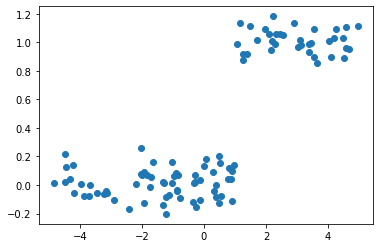

In [23]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y
X, Y = make_some_data(100)
plt.scatter(X, Y)
plt.show()

#### Mine

In [29]:
#def variance_reduction(nh,sh,nl,sl):
#    s = sh + sl
#    n = nh + nl
#   return np.var(s) - (nh*np.var(sh) + nl*np.var(sl))/n

class TreeRegressor(DecisionTree, RegressorMixin):
    
    def __init__(self, max_depth=10):
        super().__init__(max_depth)
        
    def fit(self, X, Y):
        super().fit(X, Y)
        
    def get_default_value(self, Y):
        return np.mean(Y)  
    
    def is_homogeneous(self, Y):
        variance_threshold = 0.01
        return np.var(Y) < variance_threshold
    
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n_row = len(Y)
        
        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_part = []
        high_part = Y_sorted.copy()
        
        
        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None
        
        # Go through all the positions (excluding the last position).
        for i in range(0, n_row-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_part.append(y_i)
            high_part.pop(0)
            

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            s = low_part+high_part
            n = n_row
            score = np.var(s) - ((i+1)*np.var(low_part) + (n_row-i-1)*np.var(high_part))/n
            #score = variance_reduction(i+1, low_part, n_row-i-1, high_part)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

##### Sanity check

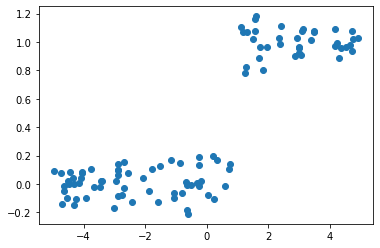

In [30]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

x, y = make_some_data(100)
plt.scatter(x, y)
plt.show()

As we can see from the figure above, the data is divided into two categories, so we can use the regressor. 
For this question we choose tree regressor.
As this data can be divided into two categories, we choose depth=1, as there are only two possible outputs and increasing the depth may result in noise and overfitting, which may reduce the correct rate.

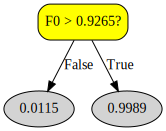

In [31]:
clf = TreeRegressor(max_depth=1)
clf.fit(x, y)
clf.draw_tree()

#### Predicting apartment prices using decision tree regression

In [32]:
TrR = TreeRegressor(max_depth=8)
TrR.fit(Xtrain, Ytrain)
TrR.score(Xtest, Ytest)

0.25506747442593103

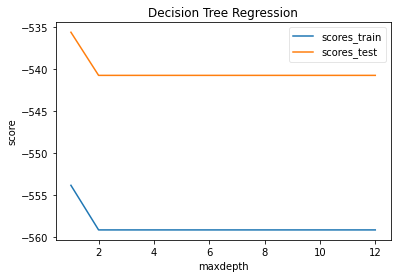

In [29]:
from sklearn import model_selection

def creat_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return model_selection.train_test_split(X, Y,test_size=0.25,random_state=1)

def test_DecisionTreeRegressor_depth(*data,maxdepth):
    X_train,X_test,Y_train,Y_test=data
    depths=np.arange(1,maxdepth)
    scores_test = []
    scores_train = []
    for depth in depths:
        regr = TreeRegressor(max_depth=depth)
        regr.fit(X_train, Y_train)
        score_test = regr.score(Xtest, Ytest)
        score_train = regr.score(Xtrain, Ytrain)
        scores_test.append(score_test)
        scores_train.append(score_train)
 
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(depths,scores_train,label="scores_train")
    ax.plot(depths,scores_test,label="scores_test")
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()
 
X_train,X_test,Y_train,Y_test=creat_data(100)    
test_DecisionTreeRegressor_depth(X_train,X_test,Y_train,Y_test,maxdepth=13)

##### Underfitting and overfitting

 Train Score for depth=0: 0.0
 Test Score for depth=0: -0.00014199351632249169
 Train Score for depth=1: 0.16135943119429585
 Test Score for depth=1: 0.15343297916467868
 Train Score for depth=2: 0.22799094625539307
 Test Score for depth=2: 0.22627565698666108
 Train Score for depth=3: 0.2566499814117077
 Test Score for depth=3: 0.2505040608022455
 Train Score for depth=4: 0.2785623658049736
 Test Score for depth=4: 0.272311474465766
 Train Score for depth=5: 0.29550429348588114
 Test Score for depth=5: 0.27799386048394825
 Train Score for depth=6: 0.31556695249784616
 Test Score for depth=6: 0.2893374073011318
 Train Score for depth=7: 0.33885653019180284
 Test Score for depth=7: 0.278301190268025
 Train Score for depth=8: 0.365206121198584
 Test Score for depth=8: 0.25506747442593103
 Train Score for depth=9: 0.3905841336123367
 Test Score for depth=9: 0.23638425708237165
 Train Score for depth=10: 0.4249138427280411
 Test Score for depth=10: 0.21887921481755024
 Train Score for dept

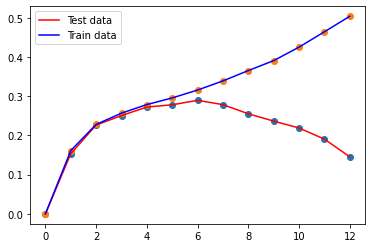

In [33]:
import matplotlib.pyplot as plt
scores_test = []
scores_train = []
for i in range(0,13):
    TrR = TreeRegressor(max_depth=i)
    TrR.fit(Xtrain, Ytrain)
    score_test = TrR.score(Xtest, Ytest)
    score_train = TrR.score(Xtrain, Ytrain)
    print(f" Train Score for depth={i}: {score_train}")
    print(f" Test Score for depth={i}: {score_test}")
    scores_test.append(score_test)
    scores_train.append(score_train)
    
plt.scatter(range(0,13), scores_test) 
plt.scatter(range(0,13), scores_train)
plt.plot(range(0,13),scores_test,'r',label='Test data')
plt.plot(range(0,13),scores_train,'b',label='Train data')
plt.legend()
plt.show()

(Train) Score for max_depth=0: 0.0
(Test) Score for max_depth=0: -0.00014199351632249169
(Train) Score for max_depth=1: 0.16135943119429585
(Test) Score for max_depth=1: 0.15343297916467868
(Train) Score for max_depth=2: 0.22799094625539307
(Test) Score for max_depth=2: 0.22627565698666108
(Train) Score for max_depth=3: 0.2566499814117077
(Test) Score for max_depth=3: 0.2505040608022455
(Train) Score for max_depth=4: 0.2785623658049736
(Test) Score for max_depth=4: 0.272311474465766
(Train) Score for max_depth=5: 0.29550429348588114
(Test) Score for max_depth=5: 0.27799386048394825
(Train) Score for max_depth=6: 0.31556695249784616
(Test) Score for max_depth=6: 0.2893374073011318
(Train) Score for max_depth=7: 0.33885653019180284
(Test) Score for max_depth=7: 0.278301190268025
(Train) Score for max_depth=8: 0.365206121198584
(Test) Score for max_depth=8: 0.25506747442593103
(Train) Score for max_depth=9: 0.3905841336123367
(Test) Score for max_depth=9: 0.23638425708237165
(Train) Score

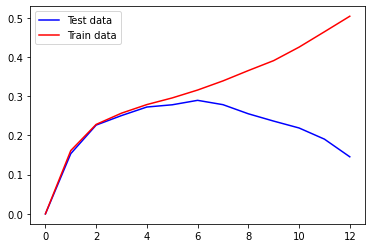

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
scores_test = []
scores_train = []
for i in range(0,13):
    clf_tree = TreeRegressor(max_depth=i)
    clf_tree.fit(Xtrain, Ytrain)
    score_test = clf_tree.score(Xtest, Ytest)
    score_train = clf_tree.score(Xtrain, Ytrain)
    print(f"(Train) Score for max_depth={i}: {score_train}")
    print(f"(Test) Score for max_depth={i}: {score_test}")
    scores_test.append(score_test)
    scores_train.append(score_train)

sns.lineplot(x=range(0,13), y=scores_test, color = 'b', label = 'Test data')
sns.lineplot(x=range(0,13), y=scores_train, color = 'r', label = 'Train data')
plt.legend()

From the images we can see that by increasing the max depth, the score of the training set gradually increases and the score of the test set first increases and then decreases. This is probably due to the fact that when the depth is too large, there will be overfitting and noise will be generated, which lead to a decrease in the correctness rate.